# Project Overview

**Project Title:** Classifying Galaxies by Subclass Using Machine Learning

**Team Members:** Araynah D., Palmer W., Katrina S., Yihan W.

In this project, we explore whether photometric magnitudes, color indices, and redshift data can be used to accurately classify galaxies into physical subclasses such as STARFORMING, STARBURST, AGN, BROADLINE, and OTHER. We use machine learning models, including Support Vector Machines (SVM) and Random Forests, to evaluate how well these features predict galaxy types based on SDSS data.


# Abstract

400–700 words summarizing:

Your research question

Data used

Modeling methods (SVM, RF, etc.)

Key findings

Challenges + next steps

We investigated whether photometric and spectroscopic redshift data could accurately classify galaxies into physical subclasses such as STARFORMING, STARBURST, AGN, BROADLINE, and an aggregated OTHER category. Our analysis utilizes publicly available Sloan Digital Sky Survey (SDSS) Data Release 18, retrieving approximately 65,000 galaxy entries with magnitudes in the u, g, r, i, and z bands, derived color indices (u–g, g–r, r–i, i–z), and spectroscopic redshift values. To reduce noise, rare subclasses (STARBURST BROADLINE, AGN BROADLINE) were combined into an “OTHER” category, and entries with missing values were removed. All features were standardized using a StandardScaler, and the dataset was split into training (70%) and testing (30%) sets.

We first applied a Support Vector Machine (SVM) classifier with linear and RBF kernels, tuned via GridSearchCV on hyperparameters including C and kernel type, and using class_weight="balanced" to address class imbalance. The tuned SVM achieved F1-scores of 0.64 for STARFORMING and 0.65 for STARBURST, with a macro F1-score of 0.30 and weighted F1-score of 0.61. We also trained a Random Forest classifier [RF model description], which yielded [RF key findings] and provided feature importance rankings highlighting [RF important features].

Our results demonstrate that photometric and redshift features hold significant predictive power for common subclasses but remain challenging for rare ones. Misclassifications observed in the confusion matrix—particularly STARFORMING galaxies predicted as AGN or STARBURST—reflect overlapping feature distributions and potential overgeneralization by the SVM. Key challenges included handling severe class imbalance, overlapping feature distributions, and tuning ensemble hyperparameters.

Looking ahead, we will explore advanced resampling techniques additional models (K-Nearest Neighbors, gradient boosting), and feature engineering or dimensionality reduction (PCA) to improve classification performance across all subclasses and deepen our understanding of galaxy evolution.



# Data Description

The dataset used in this project was obtained from the Sloan Digital Sky Survey (SDSS) SkyServer, specifically from Data Release 18 (DR18). We used the SDSS SQL search tool to query and retrieve up to 65,000 galaxy entries with both photometric and spectroscopic data.

Each row in the dataset represents a single galaxy, including measurements in five photometric bands (`u`, `g`, `r`, `i`, `z`), calculated color indices (`u_g`, `g_r`, `r_i`, `i_z`), and redshift values. The dataset also includes galaxy classification labels (`subclass`) such as STARFORMING, STARBURST, AGN, and BROADLINE, which are used as target labels in our machine learning models.

These features were selected because they are physically meaningful and commonly used in astronomy to characterize galaxy properties. In total, we used 10 input features and 1 target variable (`subclass`) to train and evaluate our classification models.


In [12]:
# Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
""" Read in data, and drop na values """

# Read in file using comment parameter to drop unwanted lines
df = pd.read_csv("Skyserver_CrossID4_12_2025 6_06_46 PM.csv", comment='#')

# Dropped na Rows
df = df.dropna()

## Data Preprocessing for SVM

We began by importing the SDSS dataset using `pd.read_csv()` with the `comment='#'` parameter. This allowed us to automatically skip metadata and comments in the file, which could otherwise interfere with our data structure. We also removed any rows containing missing values to ensure that our models would be trained on complete, clean data.

Next, we grouped rare subclasses (e.g., AGN BROADLINE, STARBURST BROADLINE) into a new `'OTHER'` category. This step was designed to reduce class imbalance and noise, which particularly helps models like SVM that are sensitive to class separation. By narrowing the subclasses to four primary groups—STARBURST, STARFORMING, AGN, BROADLINE—and OTHER, we made the classification problem more manageable.

The features selected for modeling include five photometric magnitudes (`u`, `g`, `r`, `i`, `z`), four color indices (`u_g`, `g_r`, `r_i`, `i_z`), and redshift. These were used to create our feature matrix and target labels.

We then standardized the features using `StandardScaler`, which is especially important for SVM since it relies on distance-based calculations. The data was finally split into training and testing sets (70% / 30%).

> **Note:** This is one version of preprocessing tailored for the SVM model. Other preprocessing approaches—such as keeping more subclasses or using unscaled data—may be more appropriate for models like Random Forest, which are less sensitive to scaling and imbalance. These differences are handled in separate processing and modeling sections.


In [14]:
"""
Reduce noise by grouping rare subclasses tailored for SVM classification
"""
# 1. Group rare subclasses into 'OTHER'
keep = ['STARBURST', 'STARFORMING', 'AGN', 'BROADLINE']
df['subclass_reduced'] = df['subclass'].where(df['subclass'].isin(keep), 'OTHER')

# Display Dataframe
df.head()

,objID,ra,dec,u,g,r,i,z,u_g,g_r,r_i,i_z,redshift,class,subclass,subclass_reduced
5,1237648720145285449,153.306341,-0.896848,18.95948,18.13569,17.90530,17.61372,17.52285,0.823793,0.230393,0.291582,0.090864,0.062303,GALAXY,STARBURST,STARBURST
8,1237648720145350846,153.343355,-0.871817,18.95092,17.75390,17.22394,16.90525,16.67649,1.197025,0.529955,0.318687,0.228767,0.047484,GALAXY,STARFORMING,STARFORMING
14,1237648720678944894,145.874449,-0.608755,18.19744,16.69651,16.01479,15.64210,15.39185,1.500925,0.681723,0.372692,0.250249,0.071590,GALAXY,STARFORMING,STARFORMING
18,1237648720682287313,153.595670,-0.625326,17.57071,16.13495,15.39250,15.00002,14.68709,1.435757,0.742447,0.392484,0.312931,0.085927,GALAXY,STARFORMING,STARFORMING
22,1237648721215946942,146.299839,-0.119995,17.86945,15.94067,14.97828,14.50247,14.08414,1.928787,0.962383,0.475814,0.418324,0.030704,GALAXY,AGN,AGN


# Data Visualization
Subclass distribution bar plot

Histogram or scatterplot of key features


# Modeling & Evaluation
## Support Vector Machine (SVM)
Train/test split

Fit SVM with class_weight='balanced'

Print accuracy

Show:

Confusion matrix

Classification report

## Random Forest Classifier
Fit RF

Show feature importance bar chart

Evaluate with confusion matrix + report


## Support Vector Machine (SVM) 

To evaluate whether photometric and redshift features can accurately classify galaxies into physical subclasses, we trained a Support Vector Machine (SVM) classifier.

We used a GridSearchCV approach to tune hyperparameters such as the regularization constant `C` and the kernel type (`linear` vs `rbf`). We also set `class_weight='balanced'` to help the model learn more fairly from underrepresented subclasses like AGN or BROADLINE.

We trained the model on scaled features derived from SDSS data, including photometric bands (`u`, `g`, `r`, `i`, `z`), color indices, and redshift values. The model was trained on 70% of the data and tested on the remaining 30%.

After training, we evaluated the model’s accuracy on the test set and used a confusion matrix and classification report to assess its performance across all subclasses.


In [15]:
"""
Selects input features and target variable, applies 
feature scaling to standardize input data,
and splits the dataset into training and testing sets for modeling.
"""


# Feature matrix X and target y
features = ['u','g','r','i','z','u_g','g_r','r_i','i_z','redshift']
X = df[features]                    # input features
y = df['subclass_reduced']          # reduced subclass labels

# Scale features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [16]:
"""
Train SVM using class_weight='balanced', tune with GridSearchCV, print accuracy
"""

# SVM hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced']
}

# Grid search with macro F1
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, y_train)

# Extract best model and show test accuracy
svm_model = grid.best_estimator_
accuracy = svm_model.score(X_test, y_test)
print(f"SVM Test Accuracy: {accuracy:.2f}")

# Predictions for confusion matrix/report
y_pred_svm = svm_model.predict(X_test)


SVM Test Accuracy: 0.62


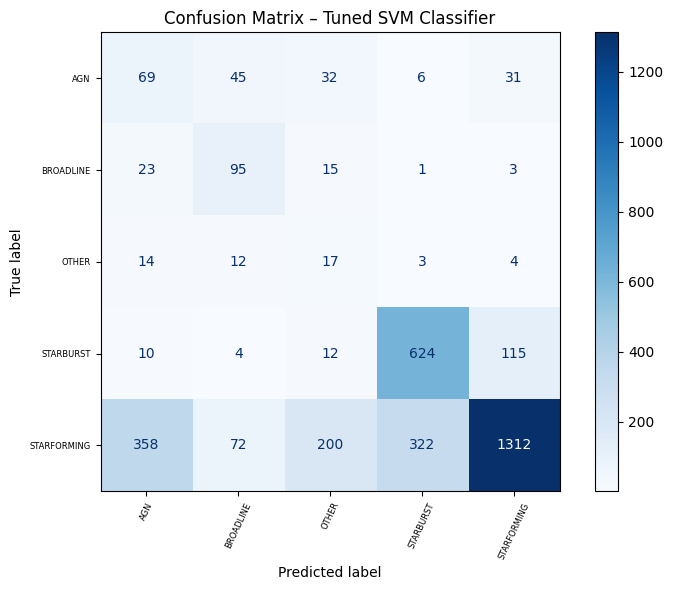

Classification Report Tuned SVM Classifier

              precision    recall  f1-score   support

         AGN       0.15      0.38      0.21       183
   BROADLINE       0.42      0.69      0.52       137
       OTHER       0.06      0.34      0.10        50
   STARBURST       0.65      0.82      0.73       765
 STARFORMING       0.90      0.58      0.70      2264

    accuracy                           0.62      3399
   macro avg       0.43      0.56      0.45      3399
weighted avg       0.77      0.62      0.67      3399



In [19]:
"""
Cell 3: Confusion matrix and classification report for SVM predictions
"""
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix – Tuned SVM Classifier")
plt.xticks(rotation=65, fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

# Classification report
print("Classification Report Tuned SVM Classifier\n")
print(classification_report(y_test, y_pred_svm))


# Model Comparison
Create table or bar chart comparing:

Accuracy

F1-score (macro/weighted)

Notes on class performance

# Summary & Conclusion
Did the models answer the question?

What worked best?

What were the biggest challenges?

Mention imbalance and potential future improvements (e.g., removing rare subclasses)


# Work Cited

In [ ]:
ouTube Video:

Brital, Anas. Random Forest Algorithm Explained. YouTube, 20 Sept. 2021, https://youtu.be/_QuGM_FW9eo.​
anasbrital98.github.io

Scikit-learn Documentation:

Scikit-learn Developers. "Confusion Matrix." Scikit-learn, https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html. Accessed 20 Apr. 2025.​

IBM Article:

IBM. "What Is Random Forest?" IBM, https://www.ibm.com/think/topics/random-forest. Accessed 20 Apr. 2025.​
cytecnet.heroinewarrior.com
+8
IBM - United States
+8
IBM - United States
+8

GeeksforGeeks Article:

GeeksforGeeks. "Random Forest Algorithm in Machine Learning." GeeksforGeeks, 16 Jan. 2025, https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/.